# Reinforcement Learning - M2019

## Arnav Kumar - 2016228

# Q2

In [14]:
import numpy as np
import matplotlib.pyplot as plt

val = np.random.random()

Stationery Case

In [10]:
Runs = 2000
TimeSteps = 2000
Bandits = 10

alpha = 0.1

AvgRewardValue = np.zeros(TimeSteps)
Optimalstep = np.zeros(TimeSteps)

AvgOptimal = np.random.normal(0,1,Bandits)
OptimalperStep = np.zeros(TimeSteps)

for i in range(Runs):
    a = np.zeros(Bandits) + 5
    r = np.zeros(TimeSteps)
    den = np.ones(Bandits)
    
    for j in range(TimeSteps):
        currAction = np.argmax(a)
        
        reward = np.random.normal(AvgOptimal[currAction], 1)
        
        a[currAction] += alpha * (reward - a[currAction])
        den[currAction] += 1
        
        r[j] = reward
        optimalAction = np.argmax(AvgOptimal)
        
        if(optimalAction == currAction):
            OptimalperStep[j] += 1
            
    AvgRewardValue += r
    
OptimalGreedyReward = AvgRewardValue / Runs
OptimalGreedyRewardPerStep = OptimalperStep / Runs

In [11]:
epsilon = 0.1
AvgRewardValue = np.zeros(TimeSteps)
Optimalstep = np.zeros(TimeSteps)

AvgOptimal = np.random.normal(0,1,Bandits)
OptimalperStep = np.zeros(TimeSteps)

for i in range(Runs):
    a = np.zeros(Bandits)
    r = np.zeros(TimeSteps)
    den = np.ones(Bandits)
    
    for j in range(TimeSteps):
        explore = True
        currAction = 0
        prob = np.random.uniform(0,1)
        
        if(prob > epsilon):
            explore = False
            
        if(explore):
            currAction = np.random.randint(Bandits)
        else:
            currAction = np.argmax(a)
            
        reward = np.random.normal(AvgOptimal[currAction], 1)
        
        a[currAction] += alpha * (reward - a[currAction])
        den[currAction] += 1
        r[j] = reward
        
        optimalAction = np.argmax(AvgOptimal)
        
        if(optimalAction == currAction):
            OptimalperStep[j] +=1
            
    AvgRewardValue += r
    
EpsilonGreedyReward = AvgRewardValue / Runs
EpsilonGreedyRewardPerStep = OptimalperStep / Runs

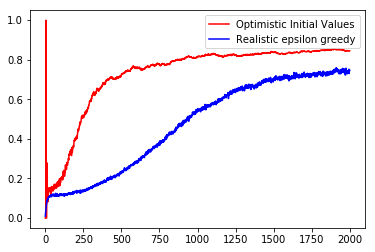

In [12]:
plt.plot(OptimalGreedyRewardPerStep,color='r',label = 'Optimistic Initial Values')
plt.plot(EpsilonGreedyRewardPerStep,color='b',label = 'Realistic epsilon greedy')
plt.legend()

Non-stationery case

In [18]:
Runs = 2000
TimeSteps = 10000
Bandits = 10

alpha = 0.1

AvgRewardValue = np.zeros(TimeSteps)
Optimalstep = np.zeros(TimeSteps)


OptimalperStep = np.zeros(TimeSteps)

for i in range(Runs):
    a = np.zeros(Bandits) + 5
    r = np.zeros(TimeSteps)
    den = np.ones(Bandits)
    AvgOptimal = np.full(Bandits,val)
    
    for j in range(TimeSteps):
        currAction = np.argmax(a)
        
        reward = np.random.normal(AvgOptimal[currAction], 1)
        
        a[currAction] += alpha * (reward - a[currAction])
        den[currAction] += 1
        
        r[j] = reward
        optimalAction = np.argmax(AvgOptimal)
        
        if(optimalAction == currAction):
            OptimalperStep[j] += 1
            
    AvgRewardValue += r
    
OptimalGreedyRewardPerStepforNonsta = OptimalperStep / Runs

In [19]:
epsilon = 0.1
AvgRewardValue = np.zeros(TimeSteps)
Optimalstep = np.zeros(TimeSteps)

OptimalperStep = np.zeros(TimeSteps)

for i in range(Runs):
    a = np.zeros(Bandits)
    r = np.zeros(TimeSteps)
    den = np.ones(Bandits)
    AvgOptimal = np.full(Bandits, val)
    
    for j in range(TimeSteps):
        explore = True
        currAction = 0
        prob = np.random.uniform(0,1)
        
        if(prob > epsilon):
            explore = False
            
        if(explore):
            currAction = np.random.randint(Bandits)
        else:
            currAction = np.argmax(a)
            
        reward = np.random.normal(AvgOptimal[currAction], 1)
        
        a[currAction] += alpha * (reward - a[currAction])
        den[currAction] += 1
        r[j] = reward
        
        optimalAction = np.argmax(AvgOptimal)
        
        if(optimalAction == currAction):
            OptimalperStep[j] +=1
            
    AvgRewardValue += r
    
EpsilonGreedyRewardPerStepforNonsta = OptimalperStep / Runs

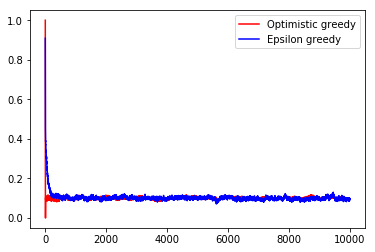

In [20]:
plt.plot(OptimalGreedyRewardPerStepforNonsta,color='r',label='Optimistic greedy')
plt.plot(EpsilonGreedyRewardPerStepforNonsta,color='b',label = 'Epsilon greedy')
plt.legend()